# Import Libraries

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [210]:
data = pd.read_csv('loksabha_election_result_2024.csv', encoding='latin1')

In [211]:
data.head()

,Constituency,State / UT,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,Rajasthan,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,Rajasthan,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,Haryana,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,Jammu and Kashmir,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,Tamil Nadu,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   State / UT          543 non-null    object
 2   Const. No.          543 non-null    int64 
 3   Leading Candidate   543 non-null    object
 4   Leading Party       543 non-null    object
 5   Trailing Candidate  542 non-null    object
 6   Trailing Party      542 non-null    object
 7   Margin              543 non-null    object
 8   Status              543 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.3+ KB


In [213]:
# converting the type of Margin as float
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')
print(data.dtypes)

Constituency           object
State / UT             object
Const. No.              int64
Leading Candidate      object
Leading Party          object
Trailing Candidate     object
Trailing Party         object
Margin                float64
Status                 object
dtype: object


In [214]:
#checking for whether there are any null values or not
data.isnull().sum()

# data['Margin'] = data['Margin'].fillna(0)
# data['Trailing Candidate'] = data['Trailing Candidate'].fillna('Unknown')
# data['Trailing Party'] = data['Trailing Party'].fillna('Unknown')

# data.isnull().sum()

Constituency          0
State / UT            0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                1
Status                0
dtype: int64

# Party and Seat with the highest and lowest margin of victory

In [173]:
#Print the columns to know from which attribute we need to do analysis 
data.columns

Index(['Constituency', 'State / UT', 'Const. No.', 'Leading Candidate',
       'Leading Party', 'Trailing Candidate', 'Trailing Party', 'Margin',
       'Status'],
      dtype='object')

In [174]:
#Group the Leading Party column based on winning margin of votes
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
print(party_votes.head(20))

Leading Party
Bharatiya Janata Party                                46081536.0
Indian National Congress                              13005922.0
Dravida Munnetra Kazhagam                              5081582.0
All India Trinamool Congress                           4910963.0
Telugu Desam                                           3660927.0
Samajwadi Party                                        2869566.0
Janata Dal (United)                                    1386413.0
Shiv Sena (Uddhav Balasaheb Thackrey)                  1015430.0
Communist Party of India (Marxist)                      746237.0
Lok Janshakti Party(Ram Vilas)                          720603.0
Nationalist Congress Party ?? Sharadchandra Pawar      716571.0
Indian Union Muslim League                              702660.0
Shiv Sena                                               700373.0
Independent                                             629302.0
Jammu & Kashmir National Conference                     470210.0
Janasena Pa

In [175]:
#idxmax() finds the index(row) which is having maxmimum value in corrosponding column
#data.loc[...] gives the the row corresponding to the index found of entire row where the Margin finds Highest and Lowest.

highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]

print("Highest Margin Victory\n",highest_margin)
print("\nLowest Margin Victory\n",lowest_margin)

Highest Margin Victory
 Constituency                               INDORE
State / UT                         Madhya Pradesh
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                  1175092.0
Status                            Result Declared
Name: 221, dtype: object

Lowest Margin Victory
 Constituency                              Mumbai North West
State / UT                                      Maharashtra
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                 48




# Plot number of seats won by each party

Bharatiya Janata Party
Apna Dal (Soneylal)


C:\Users\jiten\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


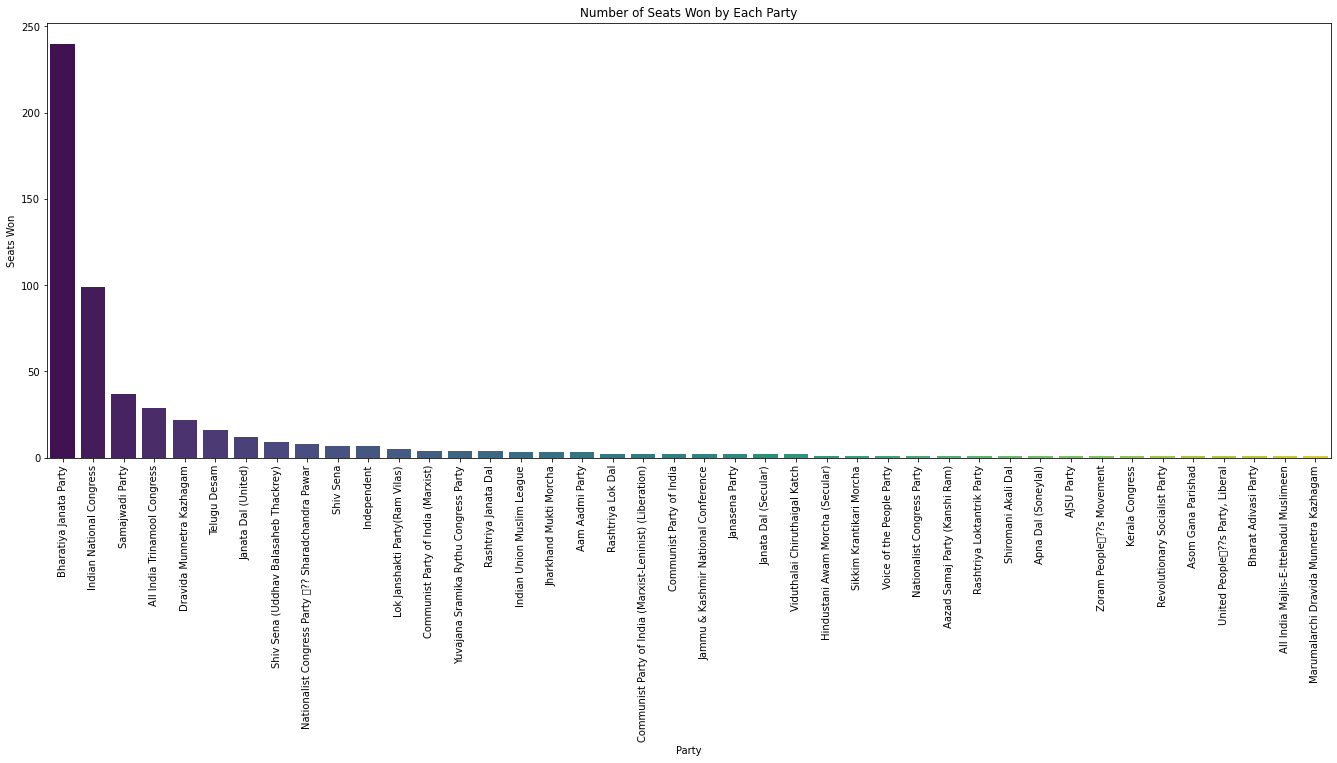

In [176]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()
print(leading_party_highest_votes)
print(leading_party_lowest_votes)

# Number of seats won by each party
seats_won = data['Leading Party'].value_counts()
 
# Plot number of seats won by each party
plt.figure(figsize=(23, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()


# Function to plot the graph with different arguments

In [177]:
def show_numbers():
    for p in plt.gca().patches:
            plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='center', fontsize=10, color='black', xytext=(0, 7), 
                               textcoords='offset points')

def plot_graph(Candidate_1, Candidate_2, Candidate_3, Candidate_4=None, y_axis=None):
    
    if(Candidate_4 is None and y_axis is None):
        plt.figure(figsize=(12, 6))
        sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
        show_numbers()
        plt.title('Comparison of Votes for ' + Candidate_1 + ' , ' + Candidate_2 + ' and ' + Candidate_3)
        plt.xlabel('Constituency')
        plt.ylabel('Votes')
        plt.xticks(rotation=45)
        plt.show()
    
    elif y_axis == 'Margin':
        plt.figure(figsize=(12,6))
        sns.barplot(data=data_to_plot, x='Leading Party', y='Margin', palette='muted')
        show_numbers()
        plt.title('Total Margin for ' + Candidate_1 + ' , ' + Candidate_2  + ' , ' + Candidate_3 + ' and ' + Candidate_4)
        plt.xlabel('Leading Party')
        plt.ylabel('Total Margin')
        plt.show()
    
    elif y_axis == 'Seats':        
        # Plot the number of seats
        plt.figure(figsize=(12, 6))
        sns.barplot(data=data_to_plot, x='Leading Party', y='Seats', palette='muted')
        show_numbers()
        plt.title('Number of Seats for ' + Candidate_1 + ' , ' + Candidate_2  + ' , ' + Candidate_3 + ' and ' + Candidate_4)
        plt.xlabel('Leading Party')
        plt.ylabel('Number of Seats')
        plt.show()
    
    elif Candidate_4 is None and y_axis == 'Margin':
        print("hello")
        plt.figure(figsize=(12,6))
        sns.barplot(data=data_to_plot, x='Leading Party', y='Margin', palette='muted')
        show_numbers()
        plt.title('Total Margin for ' + Candidate_1 + ' , ' + Candidate_2 + ' , ' + Candidate_3)
        plt.xlabel('Leading Party')
        plt.ylabel('Total Margin')
        plt.show()
    
    elif Candidate_4 is None and y_axis == 'Seats':
        plt.figure(figsize=(12, 6))
        sns.barplot(data=data_to_plot, x='Leading Party', y='Seats', palette='muted')
        show_numbers()
        plt.title('Number of Seats for ' + Candidate_1 + ' , ' + Candidate_2 + ' , ' + Candidate_3)
        plt.xlabel('Leading Party')
        plt.ylabel('Number of Seats')
        plt.show()



# Votes for Rahul Gandhi, Narendra Modi, and Amit Shah (Celeb Leaders)

In [178]:
data.columns

Index(['Constituency', 'State / UT', 'Const. No.', 'Leading Candidate',
       'Leading Party', 'Trailing Candidate', 'Trailing Party', 'Margin',
       'Status'],
      dtype='object')

In [179]:
# Find if there is any Leader has more than one constituencies or not

# Group by 'Leading Candidate' and count the number of constituencies for each
checkConstituencies = data.groupby('Leading Candidate').size()

# Filter candidates with more than one constituency
candidates_with_multiple_constituencies = checkConstituencies[checkConstituencies > 1]

print(candidates_with_multiple_constituencies)

Leading Candidate
RAHUL GANDHI    2
dtype: int64


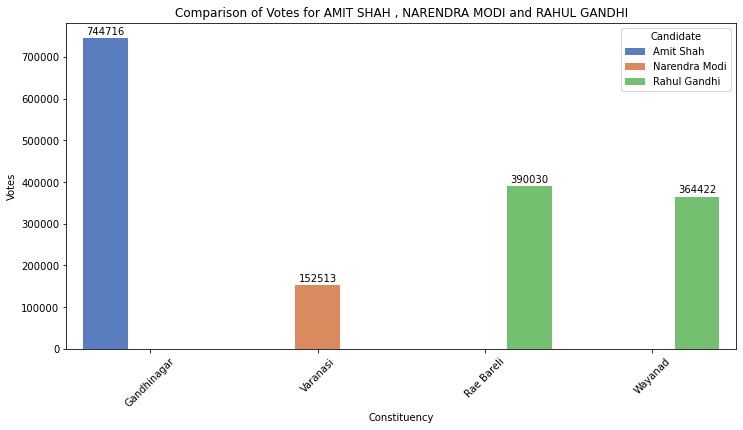

In [180]:
# Get the entries/data of Leaders
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
rahul_votes = rahul_entries['Margin'].values

# Get the original constituency names for Leaders
rahul_constituencies = list(rahul_entries['Constituency'])
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Amit Shah', 'Narendra Modi'] + ['Rahul Gandhi'] * len(rahul_votes),
    'Constituency': [amit_constituency, modi_constituency] + rahul_constituencies,
    'Votes': [amit_votes, modi_votes] + list(rahul_votes)
}) 

plot_graph(amit_entries['Leading Candidate'].values[0], modi_entries['Leading Candidate'].values[0], 
      rahul_entries['Leading Candidate'].values[0])

Amit Shah received a total of 744,716 votes in Gandhinagar, indicating a strong support base in this constituency.

Rahul Gandhi showed substantial margins in both Rae Bareli (390,030) and Wayanad (364,422), suggesting his significant influence in these areas. 


# Votes Distribution among Nitin Gadkari, Akhilesh Yadav & Shankar Lalwani

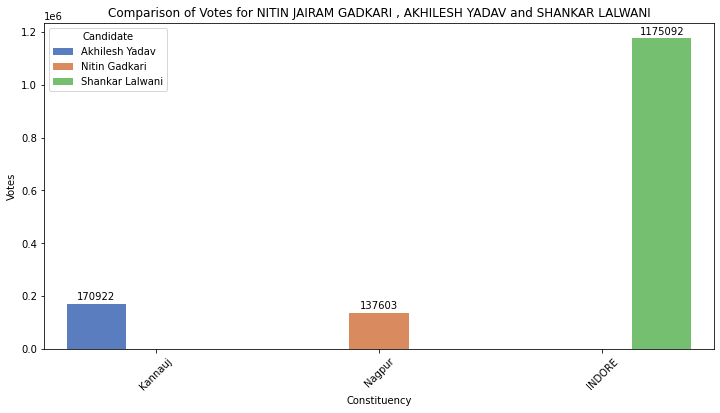

In [181]:
nitin_entries = data[data['Leading Candidate']== 'NITIN JAIRAM GADKARI']
akhilesh_entries = data[data['Leading Candidate'] == 'AKHILESH YADAV']
shankar_entries = data[data['Leading Candidate'] == 'SHANKAR LALWANI']

nitin_votes = nitin_entries['Margin'].values[0] 
akhilesh_votes = akhilesh_entries['Margin'].values[0] if not akhilesh_entries.empty else 0
shankar_votes = shankar_entries['Margin'].values[0] if not shankar_entries.empty else 0

nitin_constituency = nitin_entries['Constituency'].values[0] if not nitin_entries.empty else "Nitin Gadkari Constituency"
akhilesh_constituency = akhilesh_entries['Constituency'].values[0] if not akhilesh_entries.empty else "Akhilesh Yadav Constituency"
shankar_constituency = shankar_entries['Constituency'].values[0] if not shankar_entries.empty else "Shankar Lalwani Constituency"

#converting into dataframe to plot the graph
data_to_plot = pd.DataFrame({
    'Candidate': ['Akhilesh Yadav', 'Nitin Gadkari', 'Shankar Lalwani'],
    'Constituency': [akhilesh_constituency, nitin_constituency, shankar_constituency],
    'Votes': [akhilesh_votes, nitin_votes, shankar_votes]
})

plot_graph(nitin_entries['Leading Candidate'].values[0], akhilesh_entries['Leading Candidate'].values[0], 
          shankar_entries['Leading Candidate'].values[0])

# Votes distribution b/w BJP and INC

In [182]:
bjp_leading = data[data['Leading Party'] == 'Bharatiya Janata Party']
inc_leading = data[data['Leading Party'] == 'Indian National Congress']

bjp_lead = bjp_leading['Margin'].sum()
inc_lead = inc_leading['Margin'].sum()

data_to_plot_margin = pd.DataFrame({
    'Leading Party' : ['Bharatiya Janata Party', 'Indian National Congress'],
    'Margin' : [bjp_lead, inc_lead]
})

# Calculate seat distribution
bjp_seats = bjp_leading.shape[0]
inc_seats = inc_leading.shape[0]

data_to_plot_seats = pd.DataFrame({
    'Leading Party' : ['Bharatiya Janata Party', 'Indian National Congress'],
    'Seats' : [bjp_seats, inc_seats]
})

margin_percentage_increase = ((bjp_lead - inc_lead) / inc_lead) * 100
seat_percentage_increase = ((bjp_seats - inc_seats) / inc_seats) * 100

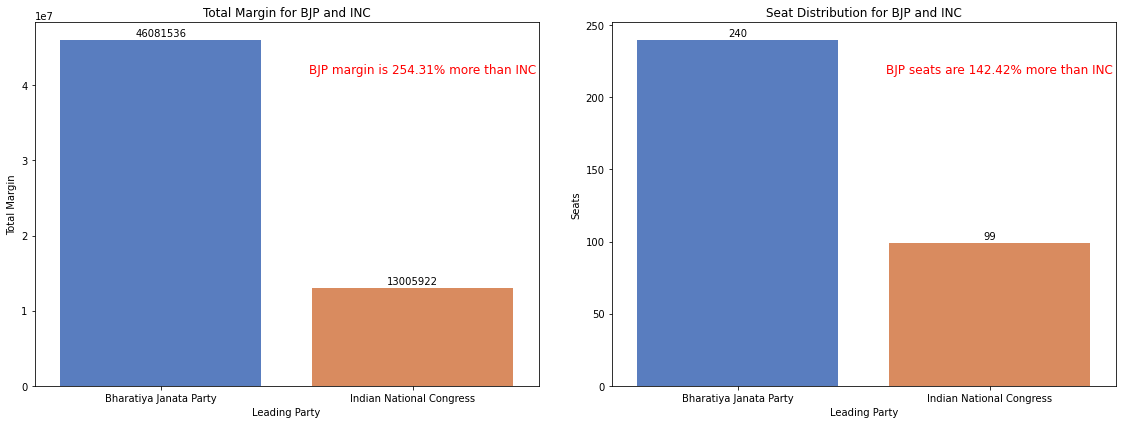

In [183]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the total margin for each leading party
sns.barplot(data=data_to_plot_margin, x='Leading Party', y='Margin', palette='muted', ax=ax1)
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 7), textcoords='offset points')
ax1.set_title('Total Margin for BJP and INC')
ax1.set_xlabel('Leading Party')
ax1.set_ylabel('Total Margin')

ax1.annotate(f'BJP margin is {margin_percentage_increase:.2f}% more than INC', 
             xy=(1, bjp_lead), xycoords='data', 
             xytext=(10, -30), textcoords='offset points',
             ha='center', va='center', fontsize=12, color='red')

# Plot the seat distribution for each leading party
sns.barplot(data=data_to_plot_seats, x='Leading Party', y='Seats', palette='muted', ax=ax2)
show_numbers()
ax2.set_title('Seat Distribution for BJP and INC')
ax2.set_xlabel('Leading Party')
ax2.set_ylabel('Seats')

# Display percentage increase
ax2.annotate(f'BJP seats are {seat_percentage_increase:.2f}% more than INC', 
             xy=(1, bjp_seats), xycoords='data', 
             xytext=(10, -30), textcoords='offset points',
             ha='center', va='center', fontsize=12, color='red')
 
# Adjust layout
plt.tight_layout()
plt.show()

# Function to plot the graph with respect to Margin and Seats for I.N.D.I.A. and N.D.A.

In [184]:
def plot_graphs(margin_data, seats_data, party):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Margin plot
    sns.barplot(ax=axes[0], data=margin_data, x='Leading Party', y='Margin', palette='muted')
    axes[0].set_title('Total Margin for ' + party + ' Leading Parties')
    axes[0].set_xlabel('Leading Party')
    axes[0].set_ylabel('Total Margin')
    axes[0].tick_params(axis='x', rotation=45)
    for p in axes[0].patches:
        axes[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 7), 
                         textcoords='offset points')

    # Seats plot
    sns.barplot(ax=axes[1], data=seats_data, x='Leading Party', y='Seats', palette='muted')
    axes[1].set_title('Number of Seats for ' + party + ' Leading Parties')
    axes[1].set_xlabel('Leading Party')
    axes[1].set_ylabel('Number of Seats')
    axes[1].tick_params(axis='x', rotation=45)
    show_numbers()
    plt.tight_layout()
    plt.show()

def plot_by_margin(party):
    # Plot state-wise margin distribution
    plt.figure(figsize=(16, 7))
    sns.barplot(data=state_margin_data, x='State / UT', y='Margin', hue='Leading Party', palette='muted')
    show_numbers()
    plt.title('State-wise Margin Distribution for ' + party + ' Leading Parties')
    plt.xlabel('State / UT')
    plt.ylabel('Margin')
    plt.xticks(rotation=60)
    plt.legend(title='Leading Party')
    plt.show()

def plot_by_seats(party):
    plt.figure(figsize=(16, 7))
    sns.barplot(data=state_data, x='State / UT', y='Seats', hue='Leading Party', palette='muted')
    show_numbers()
    plt.title('State-wise Seat Distribution for ' + party + ' Leading Parties')
    plt.xlabel('State / UT')
    plt.ylabel('Number of Seats')
    plt.xticks(rotation=60)
    plt.legend(title='Leading Party')
    plt.show()

# Votes and Seats distribution among top I.N.D.I.A. 

In [185]:
india_leading_party = ['Aam Aadmi Party', 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'Samajwadi Party', 'All India Trinamool Congress', 'Indian National Congress']

aap_data = data[data['Leading Party'] == 'Aam Aadmi Party']
shs_data = data[data['Leading Party'] == 'Shiv Sena (Uddhav Balasaheb Thackrey)']
samajwadi_data = data[data['Leading Party'] == 'Samajwadi Party']
aitc_data = data[data['Leading Party'] == 'All India Trinamool Congress']
inc_data = data[data['Leading Party'] == 'Indian National Congress']

# Sum of margins
aap_lead = aap_data['Margin'].sum()
shs_lead = shs_data['Margin'].sum()
samajwadi_lead = samajwadi_data['Margin'].sum()
aitc_lead = aitc_data['Margin'].sum()
inc_lead - inc_data['Margin'].sum()

# Data for plotting margins
margin_data_to_plot = pd.DataFrame({
    'Leading Party': ['Aam Aadmi Party', 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'Samajwadi Party', 'All India Trinamool Congress', 'INC'],
    'Margin': [aap_lead, shs_lead, samajwadi_lead, aitc_lead, inc_lead]
}) 


#plot_graph(india_leading_party[0], india_leading_party[1], india_leading_party[2], india_leading_party[3], 'Margin')

# Filter data for each party and count the number of seats
aap_seats = data[data['Leading Party'] == 'Aam Aadmi Party'].shape[0]
shs_seats = data[data['Leading Party'] == 'Shiv Sena (Uddhav Balasaheb Thackrey)'].shape[0]
samajwadi_seats = data[data['Leading Party'] == 'Samajwadi Party'].shape[0]
aitc_seats = data[data['Leading Party'] == 'All India Trinamool Congress'].shape[0]
inc_seats = data[data['Leading Party'] == 'Indian National Congress'].shape[0]


# Data for plotting seats
seats_data_to_plot = pd.DataFrame({
    'Leading Party': ['Aam Aadmi Party', 'Shiv Sena (Uddhav Balasaheb Thackrey)', 'Samajwadi Party', 'All India Trinamool Congress', 'INC'],
    'Seats': [aap_seats, shs_seats, samajwadi_seats, aitc_seats, inc_seats]
})

#plot_graph(india_leading_party[0], india_leading_party[1], india_leading_party[2], india_leading_party[3], 'Seats')

# Extract margin information for NDA leading parties
state_margin_data = data[data['Leading Party'].isin(india_leading_party)].groupby(['Leading Party', 'State / UT'])['Margin'].mean().reset_index(name='Margin')

# Extract states information
state_data = data[data['Leading Party'].isin(india_leading_party)].groupby(['Leading Party', 'State / UT']).size().reset_index(name='Seats')

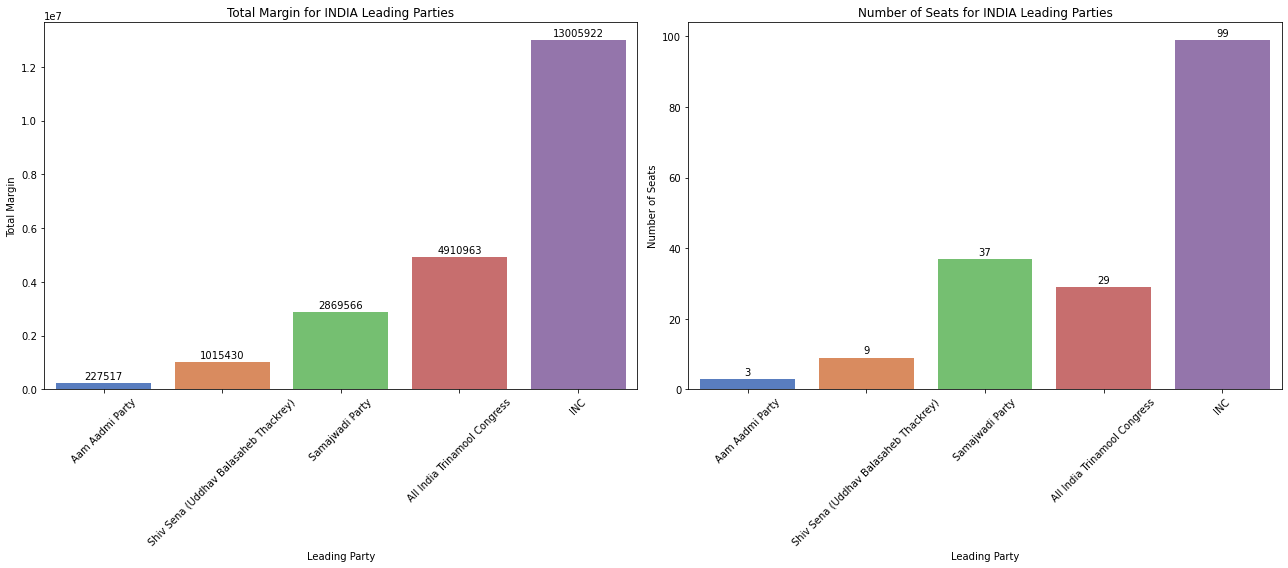

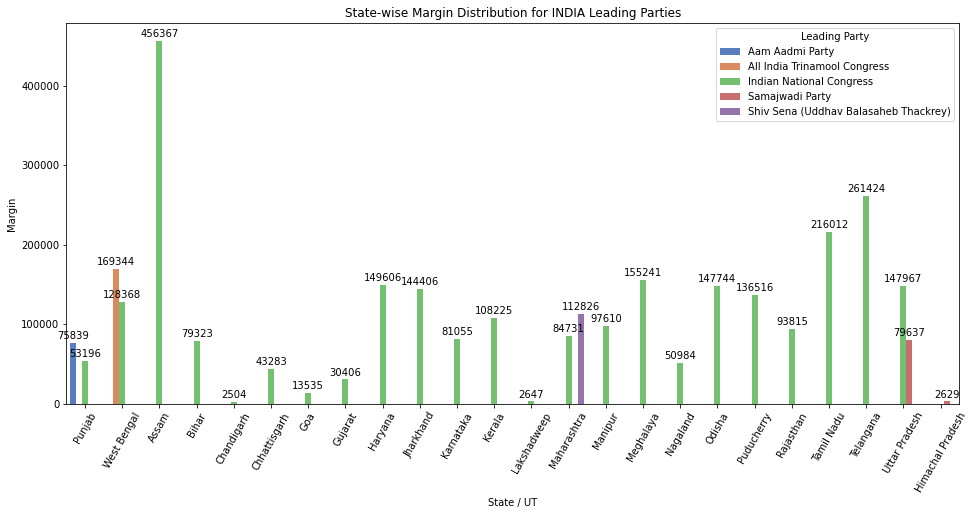

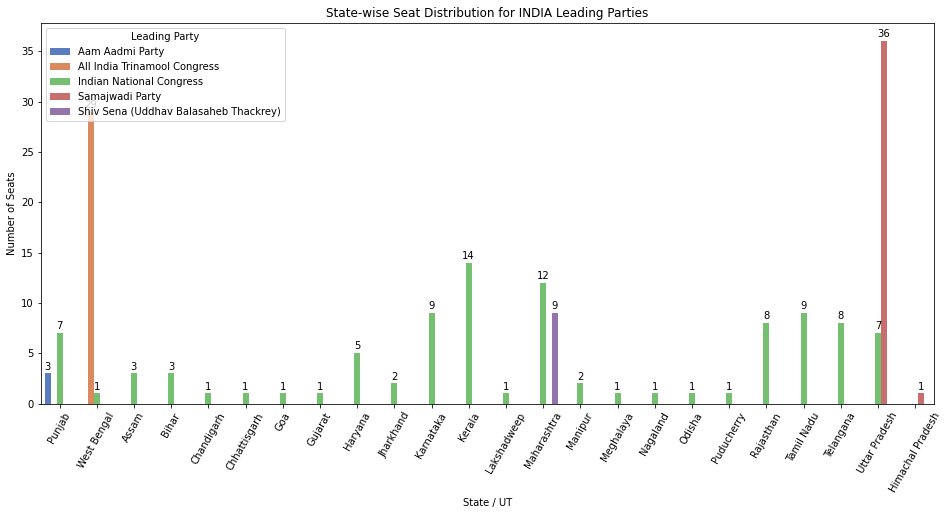

In [186]:
# Plot the graphs
plot_graphs(margin_data_to_plot, seats_data_to_plot, "INDIA")

plot_by_margin("INDIA")

plot_by_seats("INDIA")


Aam Aadmi Party has got their decent Votes Margin in their region as Punjab agianst Indian National Congress but occupied only 3 Seats, whereas INC despite having less Margin of Votes they can able to get 4 more Seats then AAP in Punjab.

Same situation is happened in Maharashtra region we can say where Shiv Sena (Uddhav Thakrey) has a big marginal Votes difference against Indian National Congress but at the end they cannot able to overcome the Seat difference. INC got a valuable 3 more Seats.

Indian National Congress has significant Margin difference from Samajwadi Party in Uttar Pradesh Region but SP has got a bigger hand with remarkable 36 Seats which is having 29 more Seats to INC.

Between Samajwadi Party and All India Trinamool Congress, we can analyse that despite SP with less Votes Margin in their UP regions compare to AITC, SP has won headline 36 Seats to ensure the Sanasad Seat, whereas AITC has more Margin among big parties and got remarkable 29 Seats among BJP and INC. 

We can analysis that INC has got way less Seats in some states which ensures their Competitive Parties have more stronger hand over there.

# Votes and Seats distribution among top N.D.A.

In [187]:
nda_leading_party = ['Janata Dal (United)', 'Shiv Sena', 'Telugu Desam', 'Lok Janshakti Party(Ram Vilas)', 'Bharatiya Janata Party']

jdu_data = data[data['Leading Party'] == 'Janata Dal (United)']
ss_data = data[data['Leading Party'] == 'Shiv Sena']
tdp_data = data[data['Leading Party'] == 'Telugu Desam'] 
ljp_data = data[data['Leading Party'] == 'Lok Janshakti Party(Ram Vilas)']
bjp_data = data[data['Leading Party'] == 'Bharatiya Janata Party']

# Sum of margins
jdu_lead = jdu_data['Margin'].sum()
ss_lead = ss_data['Margin'].sum()
tdp_lead = tdp_data['Margin'].sum()
ljp_lead = ljp_data['Margin'].sum()
bjp_lead - bjp_data['Margin'].sum()

# Data for plotting margins
margin_data_to_plot = pd.DataFrame({
    'Leading Party' : ['Janata Dal (United)', 'Shiv Sena', 'Telugu Desam', 'Lok Janshakti Party(Ram Vilas)', 'BJP'],
    'Margin' : [jdu_lead, ss_lead, tdp_lead, ljp_lead, bjp_lead]
}) 

#plot_graph(nda_leading_party[0], nda_leading_party[1], nda_leading_party[2], nda_leading_party[3], 'Margin')

# Filter data for each party and count the number of seats
jdu_seats = data[data['Leading Party'] == 'Janata Dal (United)'].shape[0]
ss_seats = data[data['Leading Party'] == 'Shiv Sena'].shape[0]
tdp_seats = data[data['Leading Party'] == 'Telugu Desam'].shape[0]
ljp_seats = data[data['Leading Party'] == 'Lok Janshakti Party(Ram Vilas)'].shape[0]
bjp_seats = data[data['Leading Party'] == 'Bharatiya Janata Party'].shape[0]

                                                                                 
# Data for plotting seats
seats_data_to_plot = pd.DataFrame({
    'Leading Party' : ['Janata Dal (United)', 'Shiv Sena', 'Telugu Desam', 'Lok Janshakti Party(Ram Vilas)', 'BJP'],
    'Seats': [jdu_seats, ss_seats, tdp_seats, ljp_seats, bjp_seats]
})

#plot_graph(nda_leading_party[0], nda_leading_party[1], nda_leading_party[2], nda_leading_party[3], 'Seats')

# Extract margin information for NDA leading parties
state_margin_data = data[data['Leading Party'].isin(nda_leading_party)].groupby(['Leading Party', 'State / UT'])['Margin'].mean().reset_index(name='Margin')

# Extract states information for NDA leading parties
state_data = data[data['Leading Party'].isin(nda_leading_party)].groupby(['Leading Party', 'State / UT']).size().reset_index(name='Seats')

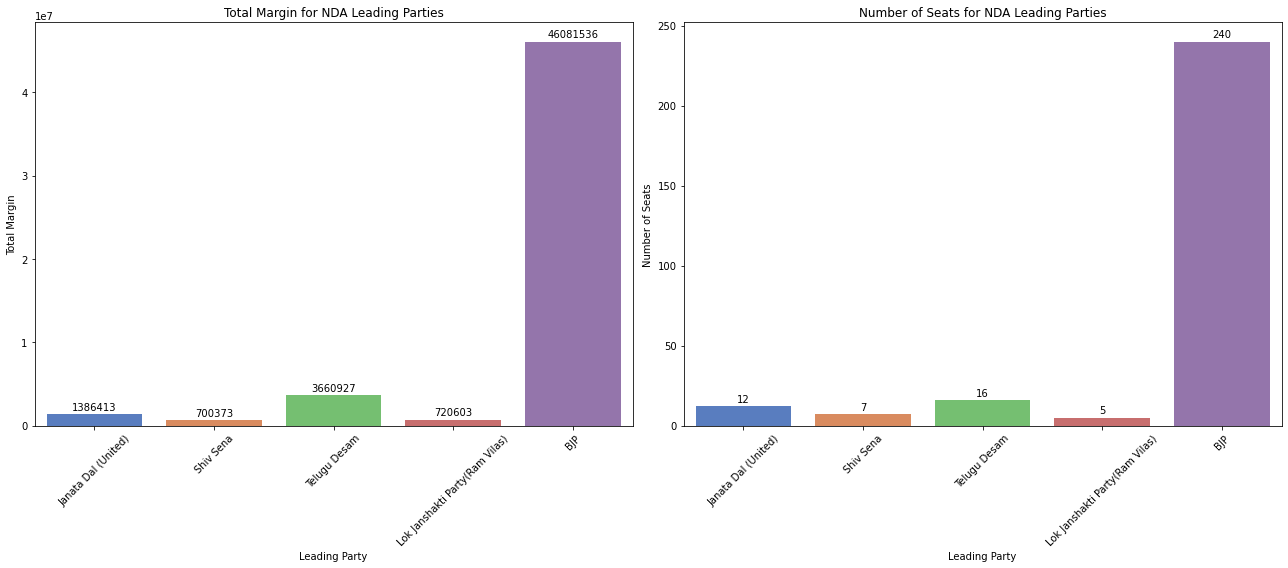

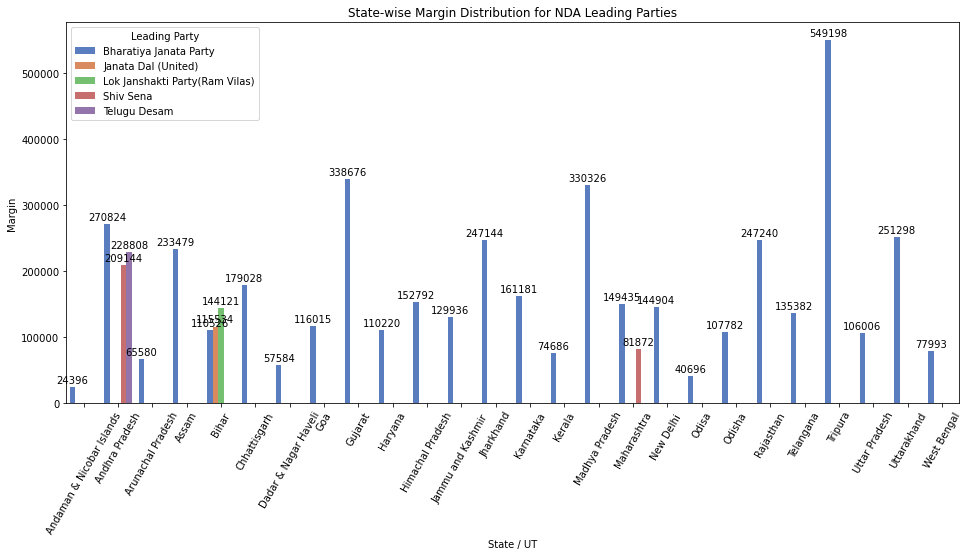

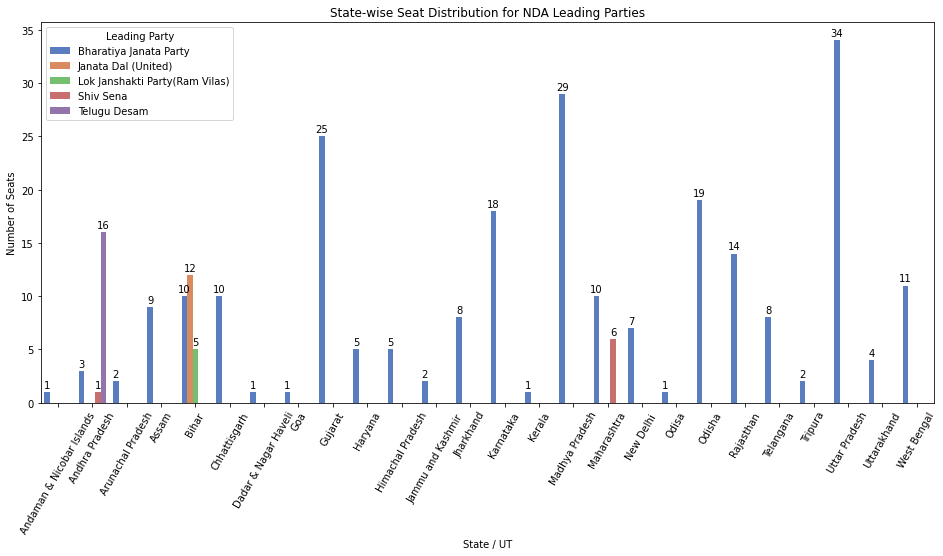

In [188]:
#Plot the graphs
plot_graphs(margin_data_to_plot, seats_data_to_plot, "NDA")

plot_by_margin("NDA")

plot_by_seats("NDA")  

Janata Dal (United) is trailing with a decent margin from Lok Janshakti Party, despite they can able to win a notable more seats than LJP and BJP in Bihar State to get Sansad Seat.

Despite Shiv Sena is having decent Votes Margin as compate to BJP, they can able to win notable 6 Seats in Maharashtra, whereas on the other hand got only a one seat against Telugu Desam in AP.

Telugu Desam Party has their strong hand in Andhra Pradesh against all their regional parties and got remarkable 16 seats to ensure the victory with a huge Margin.

Bhartiya Janata Party has significant Votes Margin across many States such as Gujarat, Madhya Pradesh, Karnataka, Rajasthan and Odisha where won a remarkable seats to achieve victory with highest seats across nation.

# Difference of Votes, Seats b/w Top2 parties of Uttar Pradesh & Maharashtra

In [189]:
# Function to get the difference of Total Votes and Respective Seats for top-2 Leading Parties
# bjp_margin = up_margin_data[up_margin_data['Leading Party'] == 'Bharatiya Janata Party']['Margin'].values[0]
# samajwadi_margin = up_margin_data[up_margin_data['Leading Party'] == 'Samajwadi Party']['Margin'].values[0]

# vote_difference = bjp_margin - samajwadi_margin
# print(vote_difference)
def difference_insight(margin_data, seat_data):
    # Sort the DataFrame by 'Margin' in descending order
    sorted_data = margin_data.sort_values(by='Margin', ascending=False)

    top_two = sorted_data.head(2)

    margin_diff = top_two.iloc[0]['Margin'] - top_two.iloc[1]['Margin']

    party_1 = top_two.iloc[0]['Leading Party']
    party_2 = top_two.iloc[1]['Leading Party']

    margin_percentage_increase = ((top_two.iloc[0]['Margin'] - top_two.iloc[1]['Margin']) / top_two.iloc[1]['Margin']) * 100
    
    print(f"The top two parties are {party_1} and {party_2}.")
    print(f"The vote difference between {party_1} and {party_2} is: {margin_diff:.0f}\n")
    print(f"Margin Increment b/w top-2 parties is : {margin_percentage_increase:.2f}%\n")


    sorted_data = seat_data.sort_values(by='Seats', ascending=False)

    top_two = sorted_data.head(2)

    seats_diff = top_two.iloc[0]['Seats'] - top_two.iloc[1]['Seats']

    party_1_seats = top_two.iloc[0]['Leading Party']
    party_2_seats = top_two.iloc[1]['Leading Party']

    print(f"The top two parties by seats are {party_1_seats} and {party_2_seats}.")
    print(f"The seat difference between them is: {seats_diff}")

In [190]:
# Function to plot the Graph

def plot(margin_data, seat_data, State):
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Plot the total margin for each leading party
    sns.barplot(data=margin_data, x='Leading Party', y='Margin', palette='muted', ax=axes[0])
    for p in axes[0].patches:
        axes[0].annotate('{:.0f}'.format(p.get_height()), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 7), 
                         textcoords='offset points')
    axes[0].set_title('Total Margin for Each Leading Party in ' + State)
    axes[0].set_xlabel('Leading Party')
    axes[0].set_ylabel('Total Margin')
    axes[0].tick_params(axis='x', rotation=60) 

    # Plot the number of seats for each leading party
    sns.barplot(data=seat_data, x='Leading Party', y='Seats', palette='muted', ax=axes[1])
    show_numbers()
    axes[1].set_title('Number of Seats for Each Leading Party in ' + State)
    axes[1].set_xlabel('Leading Party')
    axes[1].set_ylabel('Number of Seats')
    axes[1].tick_params(axis='x', rotation=60)

    # Adjust layout
    plt.tight_layout()
    plt.show()

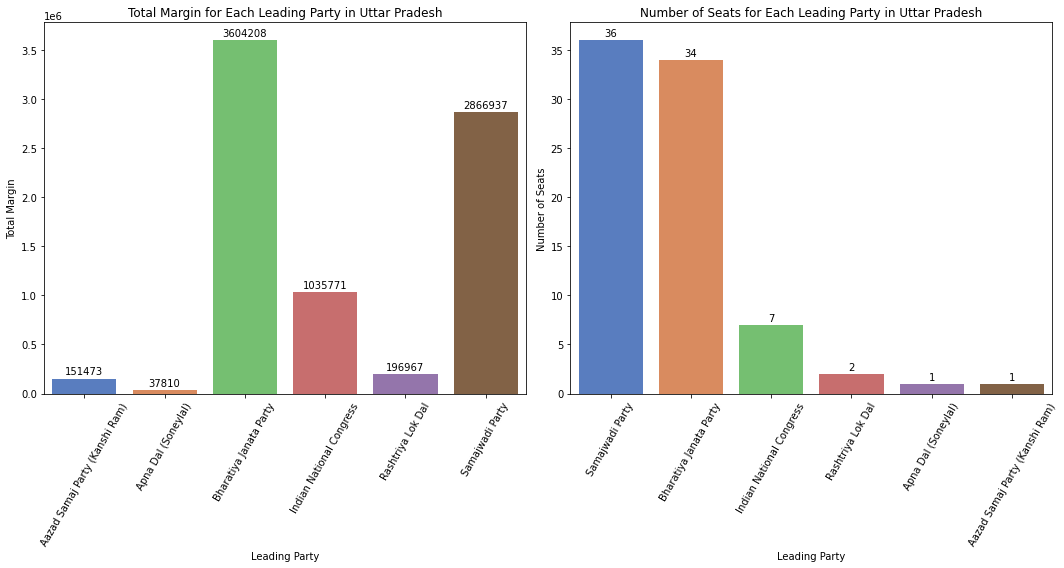

The top two parties are Bharatiya Janata Party and Samajwadi Party.
The vote difference between Bharatiya Janata Party and Samajwadi Party is: 737271

Margin Increment b/w top-2 parties is : 25.72%

The top two parties by seats are Samajwadi Party and Bharatiya Janata Party.
The seat difference between them is: 2


In [191]:
up_data = data[data['State / UT'] == "Uttar Pradesh"]

up_margin_data = up_data.groupby('Leading Party')['Margin'].sum().reset_index()

up_seat_data = up_data['Leading Party'].value_counts().reset_index()

up_seat_data.columns = ['Leading Party', 'Seats']

plot(up_margin_data, up_seat_data, "Uttar Pradesh")

difference_insight(up_margin_data, up_seat_data)

Despite BJP's overwhelming lead in total vote margin, SP has managed to secure more seats.

BJP, despite having the highest vote margin, has slightly fewer seats than SP, suggesting that its vote distribution is more spread out.

SP's ability to secure the highest number of seats with a lower margin compared to BJP suggests highly concentrated support in key areas.

This analysis suggests that while BJP has broad support, SP has strategically targeted constituencies to maximize seat wins. INC, despite having a significant vote margin, needs to improve its seat conversion efficiency. Smaller parties play a role in the political landscape but with limited influence.

C:\Users\jiten\AppData\Local\Temp\ipykernel_16424\3109264932.py:27: UserWarning: Glyph 159 (\x9f) missing from current font.
  plt.tight_layout()
C:\Users\jiten\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


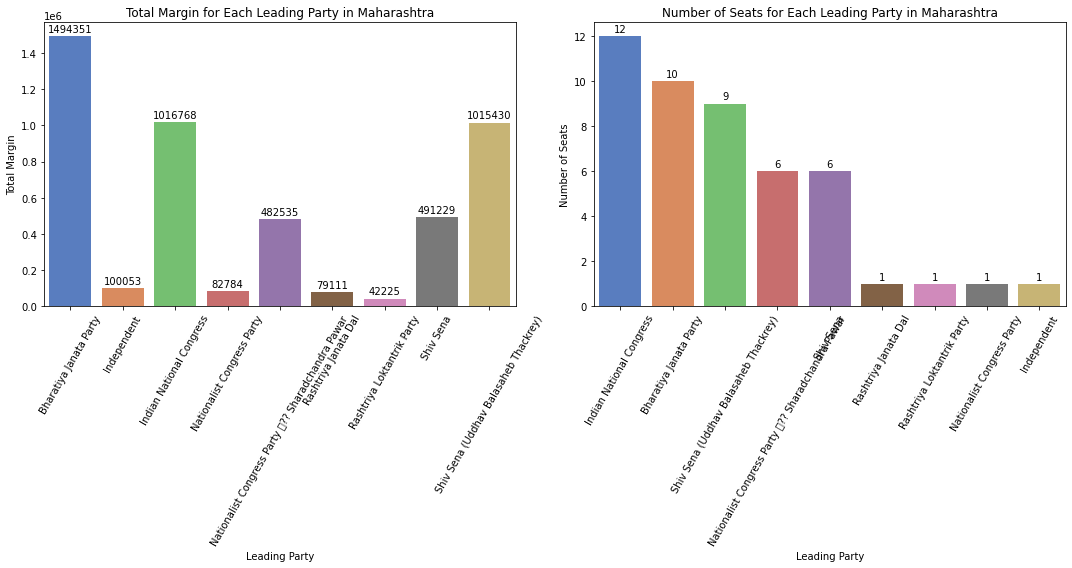

The top two parties are Bharatiya Janata Party and Indian National Congress.
The vote difference between Bharatiya Janata Party and Indian National Congress is: 477583

Margin Increment b/w top-2 parties is : 46.97%

The top two parties by seats are Indian National Congress and Bharatiya Janata Party.
The seat difference between them is: 2


In [192]:
mh_data = data[data['State / UT'] == 'Maharashtra']

mh_margin_data = mh_data.groupby('Leading Party')['Margin'].sum().reset_index()

mh_seat_data = mh_data['Leading Party'].value_counts().reset_index()

mh_seat_data.columns = ['Leading Party', 'Seats']

plot(mh_margin_data, mh_seat_data, "Maharashtra")

difference_insight(mh_margin_data, mh_seat_data)

Despite BJP's significant lead in total vote margin, INC has managed to secure more seats. This indicates that INC's support is more concentrated in specific constituencies, leading to more efficient seat conversion.

Shiv Sena's performance is notable in that its total vote margin is quite close to INC, yet it has secured fewer seats, indicating a distribution of votes that does not translate as effectively into seat wins.

This analysis suggests that while BJP has broad support, INC has strategically targeted constituencies to maximize seat wins. Shiv Sena remains a strong regional player with competitive margins and seat counts.

# Votes Distribution of Ahmedabad City and it's Leading Candidate 

In [193]:
ahmedabad_east_data = data[data['Constituency'] == 'Ahmedabad East']
ahmedabad_west_data = data[data['Constituency'] == 'Ahmedabad West']

# Get votes of east and west zone
abad_east_votes = ahmedabad_east_data['Margin'].values[0]
abad_west_votes = ahmedabad_west_data['Margin'].values[0]

# Get Leading Candidate names from respective zones
abad_east_leading_candidate = ahmedabad_east_data['Leading Candidate'].values[0]
abad_west_leading_candidate = ahmedabad_west_data['Leading Candidate'].values[0]

# Get Leading Candidate names from respective zones
abad_east_trailing_candidate = ahmedabad_east_data['Trailing Candidate'].values[0]
abad_west_trailing_candidate = ahmedabad_west_data['Trailing Candidate'].values[0]

print("Ahmedabad east zone votes", abad_east_votes)
print("Ahmedabad west zone votes", abad_west_votes, "\n")

print(abad_east_leading_candidate, " is Leading Candidate from East Zone")
print(abad_west_leading_candidate, " is Leading Candidate from West Zone\n")

print(abad_east_trailing_candidate, " is Trailing Candidate from East Zone")
print(abad_west_trailing_candidate, " is Trailing Candidate from West Zone")

Ahmedabad east zone votes 461755.0
Ahmedabad west zone votes 286437.0 

HASMUKHBHAI PATEL (H.S.PATEL)  is Leading Candidate from East Zone
DINESHBHAI MAKWANA (ADVOCATE)  is Leading Candidate from West Zone

HIMMATSINH PRAHLADSINH PATEL  is Trailing Candidate from East Zone
BHARAT YOGENDRA MAKWANA  is Trailing Candidate from West Zone


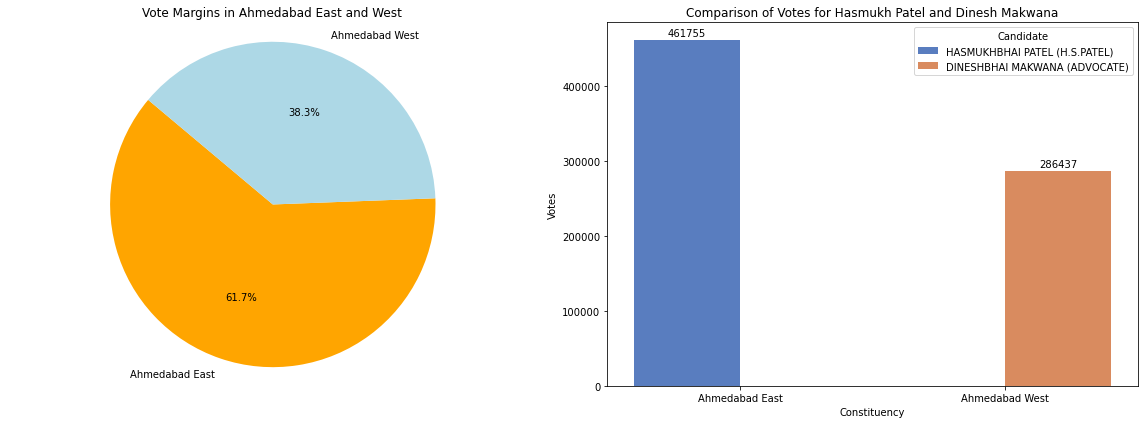

In [194]:
# Pie chart data
labels = ['Ahmedabad East', 'Ahmedabad West']
sizes = [abad_east_votes, abad_west_votes]
colors = ['orange', 'lightblue']

# Bar plot data
data_to_plot = pd.DataFrame({
    'Candidate': [abad_east_leading_candidate, abad_west_leading_candidate],
    'Constituency': ['Ahmedabad East', 'Ahmedabad West'],
    'Votes': [abad_east_votes, abad_west_votes]
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Vote Margins in Ahmedabad East and West')

# Bar plot
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted', ax=ax2)
show_numbers()
ax2.set_title('Comparison of Votes for Hasmukh Patel and Dinesh Makwana')
ax2.set_xlabel('Constituency')
ax2.set_ylabel('Votes')
ax2.legend(title='Candidate')
ax2.set_xticklabels(data_to_plot['Constituency'], rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

Ahmedabad East has a significantly higher vote margin compared to Ahmedabad West. Specifically, the margin in Ahmedabad East is approximately 61% higher than that in Ahmedabad West. This suggests stronger support for the leading party or candidate in Ahmedabad East.

The significant difference in vote margins between Ahmedabad East and West suggests a stronger support base for the leading party or candidate in Ahmedabad East.

This could be due to a variety of factors, including higher voter turnout, more effective campaigning, and the socio-economic dynamics of the region. 

# States where Bharatiya Janata Party has clean sweeped  

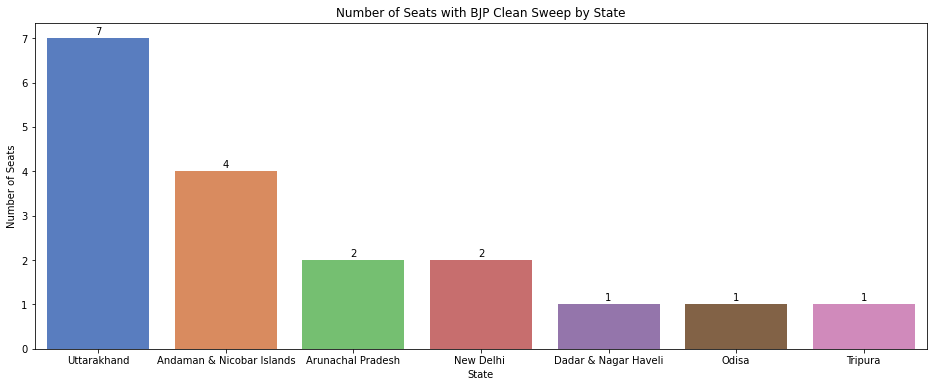

In [224]:
#first grooup by the State/UT based on Leading Party is BJP
#do check for Leading party is BJP 
#count the number of seats with the help of value_counts() function
#convert into dataframe to plot the graph

def is_clean_sweep(group):
    return (group['Leading Party'] == "Bharatiya Janata Party").all()

clean_sweep_states = data.groupby('State / UT').filter(is_clean_sweep)

seat_counts = clean_sweep_states['State / UT'].value_counts()

clean_sweep_state_list = clean_sweep_states['State / UT'].unique().tolist()
#print(clean_sweep_state_list)
 
# Convert the counts to a DataFrame for easier plotting
data_to_plot = pd.DataFrame({
    'State': clean_sweep_state_list,
    'Seats': seat_counts
}) 

plt.figure(figsize=(16, 6))
sns.barplot(data=data_to_plot, x='State', y='Seats', palette='muted')
show_numbers()
plt.title('Number of Seats with BJP Clean Sweep by State')
plt.xlabel('State')
plt.ylabel('Number of Seats')
plt.show()

# States where Bharatiya Janata Party has won more than 50% seats

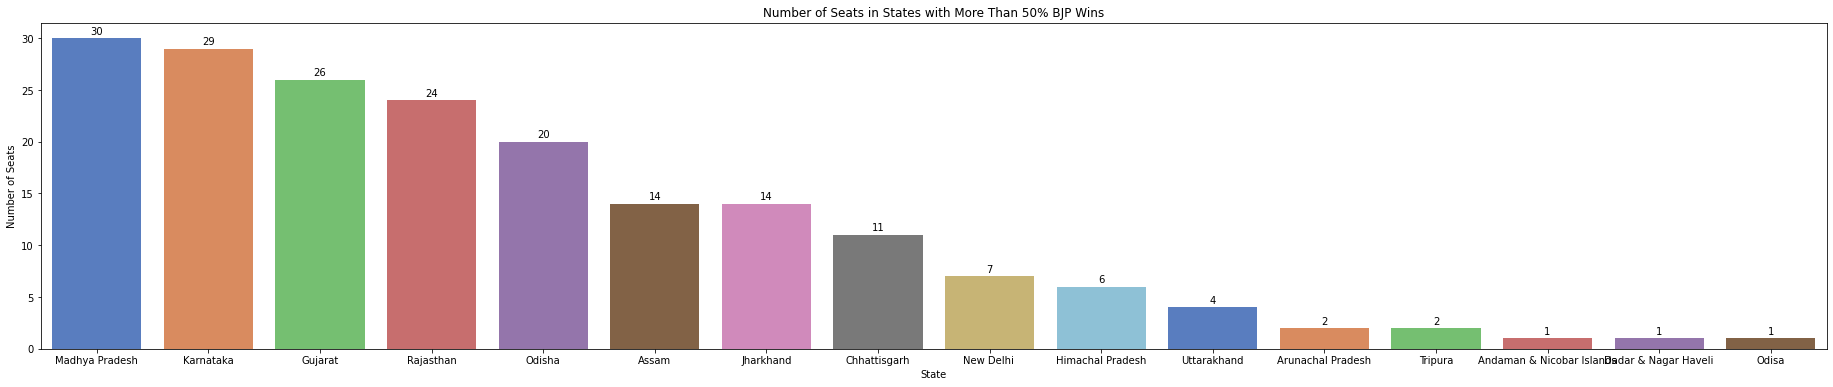

In [223]:
# first group by 'State / UT' and calculate the percentage of BJP wins
# Filter states where more than 50% of seats are won by BJP
# Count the number of seats in these states

grouped = data.groupby('State / UT').apply(lambda x: (x['Leading Party'] == 'Bharatiya Janata Party').mean())

states_above_50_percent = grouped[grouped > 0.50].index

filtered_data = data[data['State / UT'].isin(states_above_50_percent)]
#print(filtered_data)
seat_counts = filtered_data['State / UT'].value_counts()

# Convert the counts to a DataFrame
seat_counts_df = seat_counts.reset_index()
seat_counts_df.columns = ['State', 'Seats']
 
plt.figure(figsize=(32, 6))
sns.barplot(data=seat_counts_df, x='State', y='Seats', palette='muted')
show_numbers()
plt.title('Number of Seats in States with More Than 50% BJP Wins')
plt.xlabel('State')
plt.ylabel('Number of Seats')
plt.show()


# States where Bharatiya Janata Party has not won along with seats

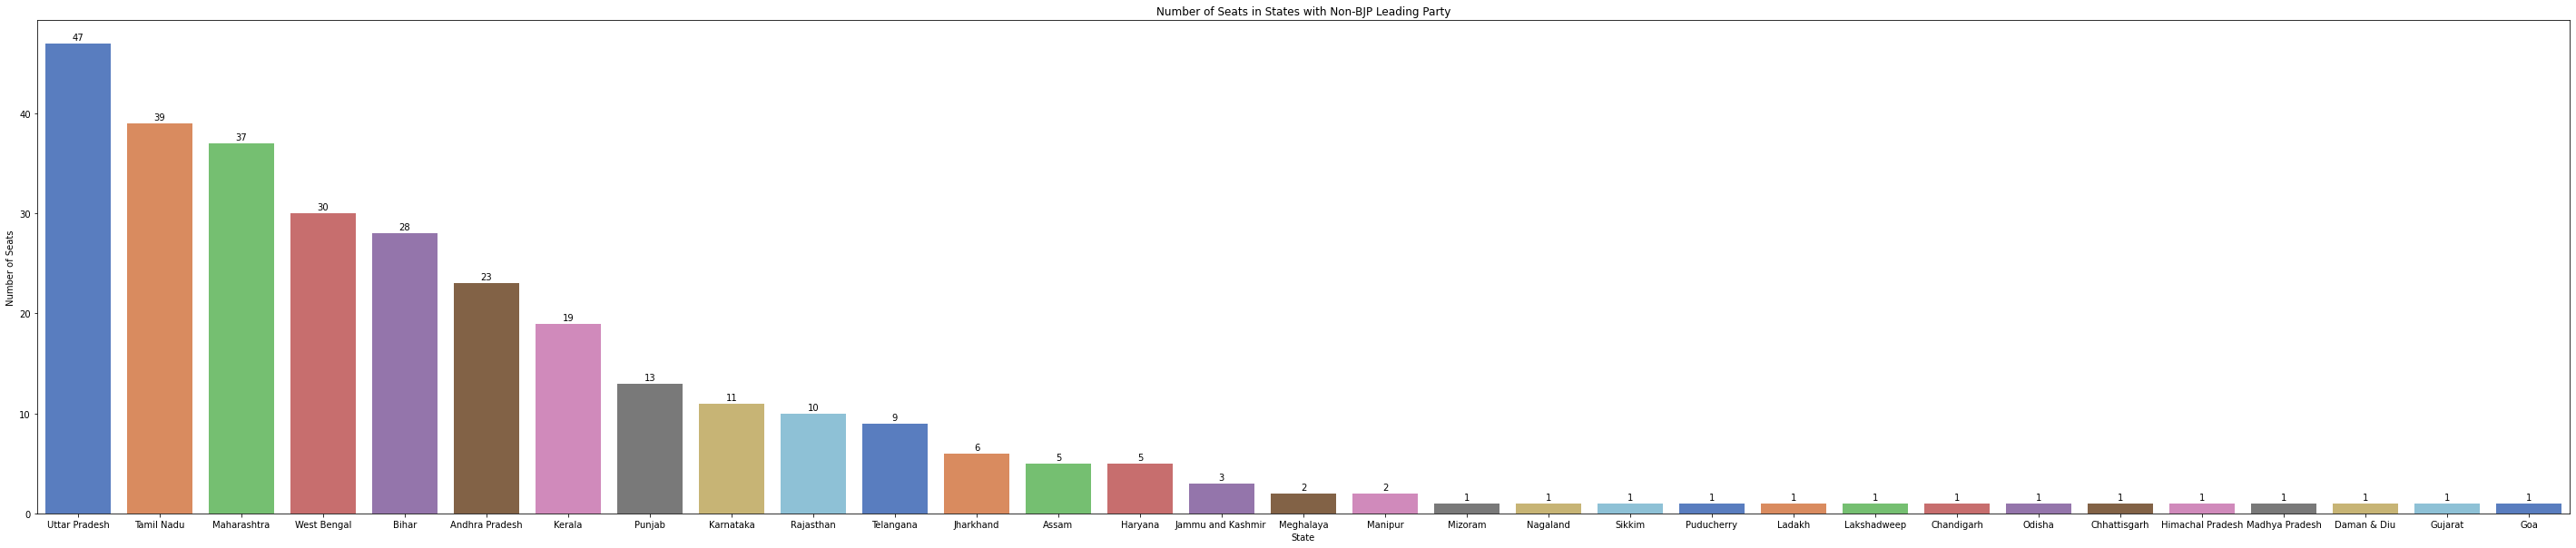

In [220]:
# Filter the data where the leading party is not BJP
non_bjp_data = data[data['Leading Party'] != 'Bharatiya Janata Party']

# Count the number of seats in each state
seat_counts_non_bjp = non_bjp_data['State / UT'].value_counts()
#print(seat_counts_non_bjp)

# Convert the counts to a DataFrame
seat_counts_non_bjp_df = seat_counts_non_bjp.reset_index()
seat_counts_non_bjp_df.columns = ['State', 'Seats']

# Plot the bar chart
plt.figure(figsize=(50, 10))
sns.barplot(data=seat_counts_non_bjp_df, x='State', y='Seats', palette='muted')

for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 7), 
                       textcoords='offset points')
    
plt.title('Number of Seats in States with Non-BJP Leading Party')
plt.xlabel('State')
plt.ylabel('Number of Seats')
plt.show() 

# Votes distribution among all parties 

C:\Users\jiten\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


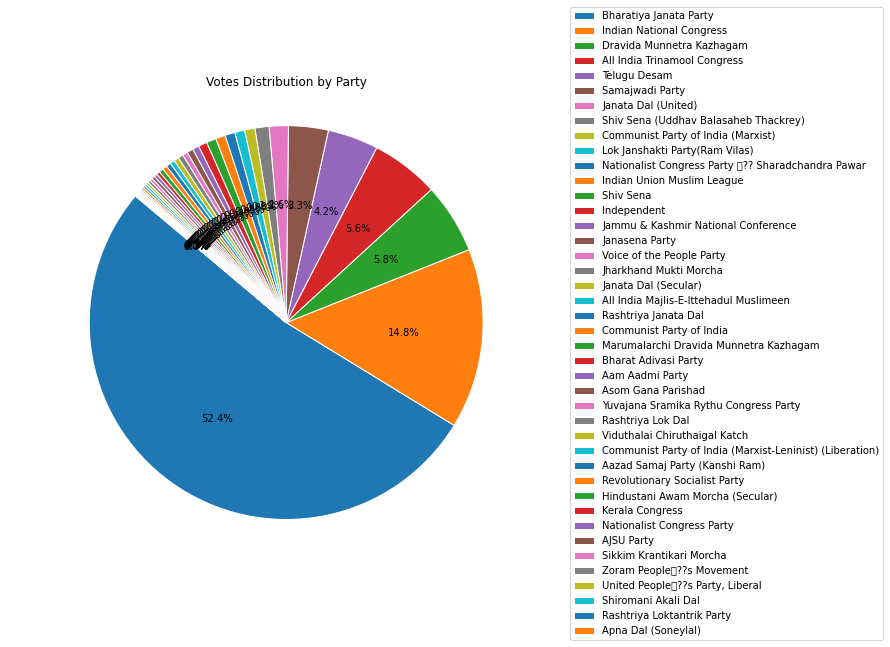

In [219]:
# first do grouo by with respect to Leading Party 
# after grouping select the margin column and do sum of grouped Leading Party
# sort the resulting Series in descending order 
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

plt.show()

We can clearly see that Bharatiya Janata Party has won nearly more than 50% of Votes Margin across nation to become Ruling Party.

Whereas Indian National Congress is having notable around 38% of Votes Margin differnce from Ruling Party. 

# State wise total Margin and occupied Seats by Bharatiya Janata Party

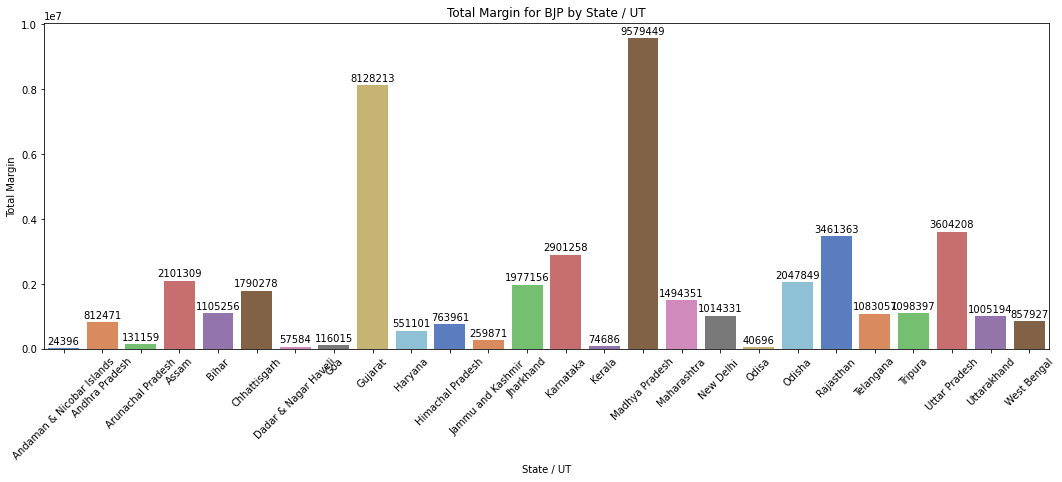

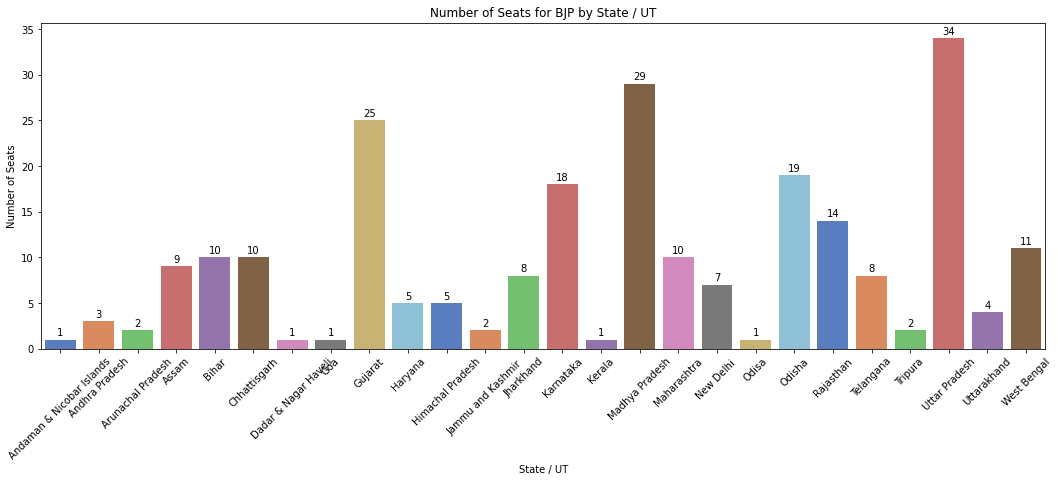

In [218]:
#Filter data for BJP
bjp_data = data[data['Leading Party'] == 'Bharatiya Janata Party']

# Group data by State / UT and sum the margins
grouped_data = bjp_data.groupby('State / UT')['Margin'].sum().reset_index()

# Plot the total margin for BJP by State / UT
plt.figure(figsize=(18, 6))
sns.barplot(data=grouped_data, x='State / UT', y='Margin', palette='muted')
show_numbers()
plt.title('Total Margin for BJP by State / UT')
plt.xlabel('State / UT')
plt.ylabel('Total Margin')
plt.xticks(rotation=45)
plt.show()


# Group data by State / UT and count the number of seats
seat_data = bjp_data.groupby('State / UT')['Leading Party'].count().reset_index(name='Number of Seats')

# Plot the total margin for BJP by State / UT
plt.figure(figsize=(18, 6))
sns.barplot(data=seat_data, x='State / UT', y='Number of Seats', palette='muted')
show_numbers()
plt.title('Number of Seats for BJP by State / UT')
plt.xlabel('State / UT')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.show()


# State wise Seats won by Bharatiya Janata Party from all given Seats

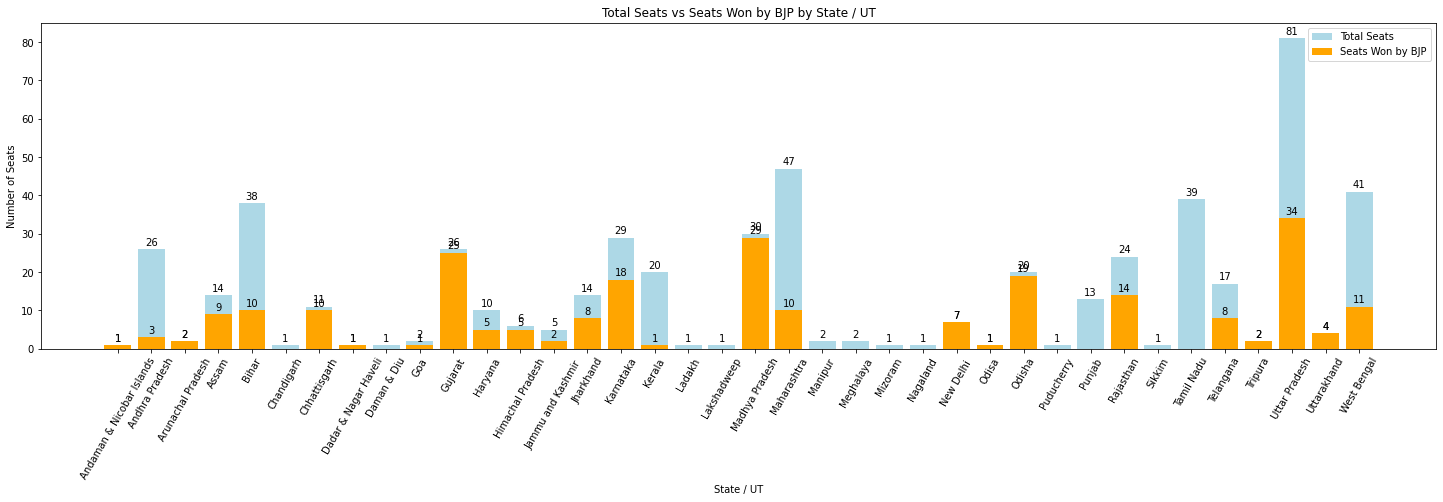

In [217]:
# Filter data for BJP
bjp_data = data[data['Leading Party'] == 'Bharatiya Janata Party']

# Group data by State / UT and count the total number of seats and the number of seats won by BJP
seat_data = bjp_data.groupby('State / UT')['Leading Party'].count().reset_index(name='Seats Won')
total_seat_data = data.groupby('State / UT')['Leading Party'].count().reset_index(name='Total Seats')


# Merge the two dataframes on State / UT
merged_data = pd.merge(total_seat_data, seat_data, on='State / UT', how='left')

# Plot the total and won seats for BJP by State / UT
plt.figure(figsize=(25, 6))
plt.bar(merged_data['State / UT'], merged_data['Total Seats'], color='lightblue', label='Total Seats')
plt.bar(merged_data['State / UT'], merged_data['Seats Won'], color='orange', label='Seats Won by BJP')
show_numbers()
plt.title('Total Seats vs Seats Won by BJP by State / UT')
plt.xlabel('State / UT')
plt.ylabel('Number of Seats')
plt.legend()
plt.xticks(rotation=60)
plt.show()
 
 

Bharatiya Janata Party has won their Seats one sided or significant margin in such States as Gujarat, Madhya Pradesh, Odisha, Rajasthan, New Delhi where they have got nearly 100% or more than 50% Seats.

Where on the other hand, State having big total of Seats such as Maharashtra, Uttar Pradesh, West Bengal, Kerala BJP cannot able to cross a notable way mark(i.e. at least 25-30%) for Seats counting. Other Regional Parties or Competitive Defence Party has made their strong move towards their victory.

# State wise Seats won by BJP with respect to INC

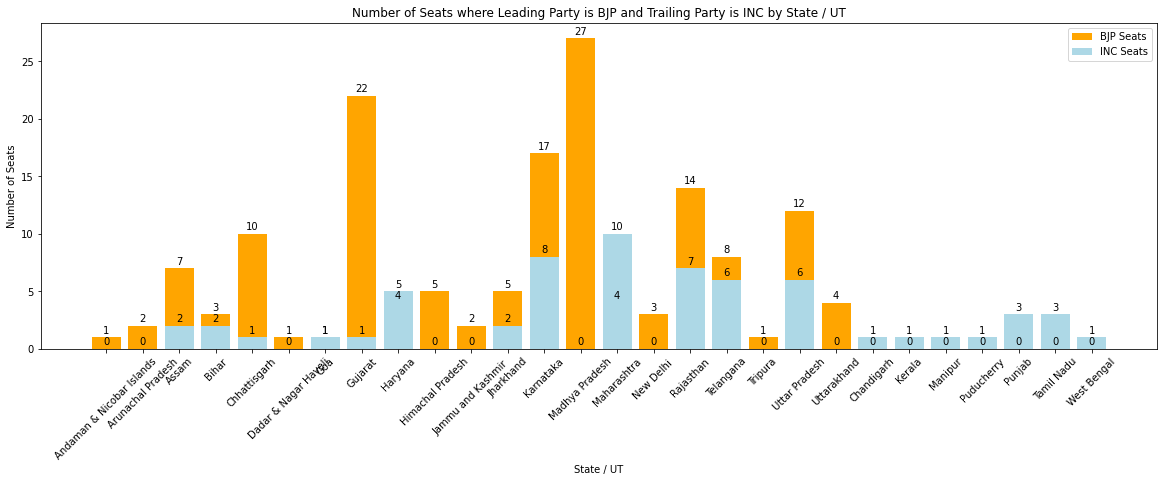

In [216]:
#Filter data where leading party is BJP
bjp_data = data[ (data['Leading Party'] == 'Bharatiya Janata Party') & (data['Trailing Party'] == 'Indian National Congress')]
# Filter data where trailing party is INC
inc_data = data[ (data['Leading Party'] == 'Indian National Congress') & (data['Trailing Party'] == 'Bharatiya Janata Party')]

# Group data by State / UT and count the number of seats
bjp_seat_data = bjp_data.groupby('State / UT').size().reset_index(name='BJP Seats')
inc_seat_data = inc_data.groupby('State / UT').size().reset_index(name='INC Seats')

# Merge the two dataframes on State / UT
merged_data = pd.merge(bjp_seat_data, inc_seat_data, on='State / UT', how='outer').fillna(0)

# Plot the number of seats for each state where leading party is BJP and trailing party is INC
plt.figure(figsize=(20, 6))
plt.bar(merged_data['State / UT'], merged_data['BJP Seats'], color='orange', label='BJP Seats')
plt.bar(merged_data['State / UT'], merged_data['INC Seats'], color='lightblue', label='INC Seats')
show_numbers()
plt.title('Number of Seats where Leading Party is BJP and Trailing Party is INC by State / UT')
plt.xlabel('State / UT')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# State wise Seats lost by BJP with respect to all the parties 

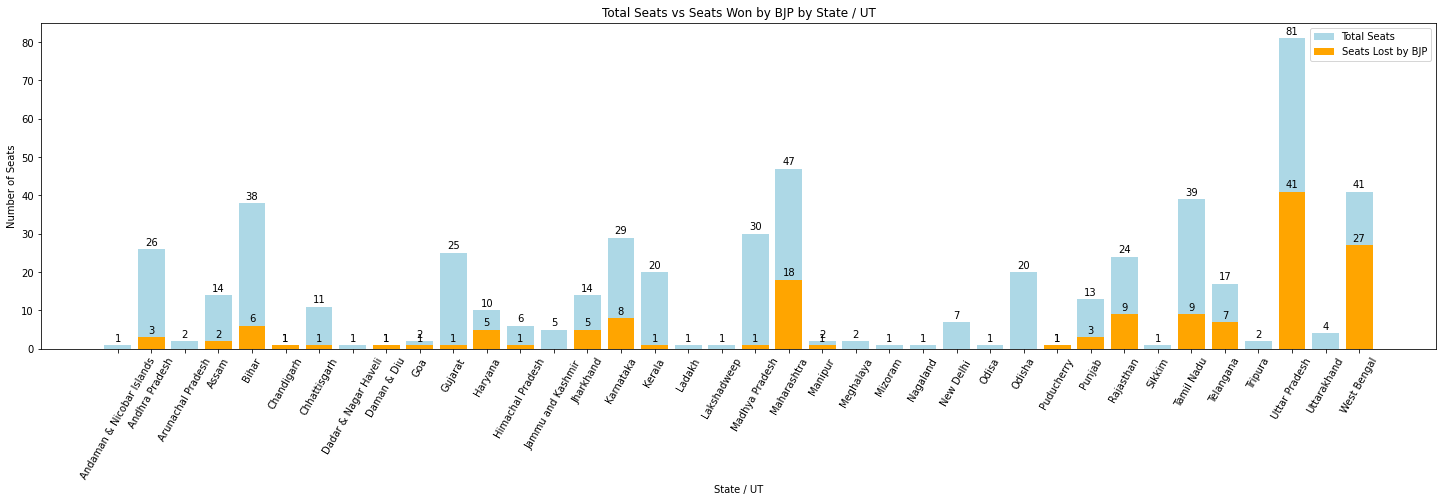

In [215]:
# Filter data for BJP
bjp_data = data[data['Trailing Party'] == 'Bharatiya Janata Party']

# Group data by State / UT and count the total number of seats and the number of seats won by BJP
seat_data = bjp_data.groupby('State / UT')['Trailing Party'].count().reset_index(name='Seats Lost')
total_seat_data = data.groupby('State / UT')['Trailing Party'].count().reset_index(name='Total Seats')

# Merge the two dataframes on State / UT
merged_data = pd.merge(total_seat_data, seat_data, on='State / UT', how='left')

# Plot the total and won seats for BJP by State / UT
plt.figure(figsize=(25, 6))
plt.bar(merged_data['State / UT'], merged_data['Total Seats'], color='lightblue', label='Total Seats')
plt.bar(merged_data['State / UT'], merged_data['Seats Lost'], color='orange', label='Seats Lost by BJP')
show_numbers()
plt.title('Total Seats vs Seats Won by BJP by State / UT')
plt.xlabel('State / UT')
plt.ylabel('Number of Seats')
plt.legend()
plt.xticks(rotation=60)
plt.show()

Bharatiya Janata Party has done very well for some States to get the remarkable Seats but in which States they have lost very significantly such as in Uttar Pradesh and West Bengal they lost with 50% of Seats Margin.

Thus we can say in such States including Maharashtra where their regional parties are still having big margin to win their respective States.

# Top 10 Trailing Party by Votes Margin and Seats

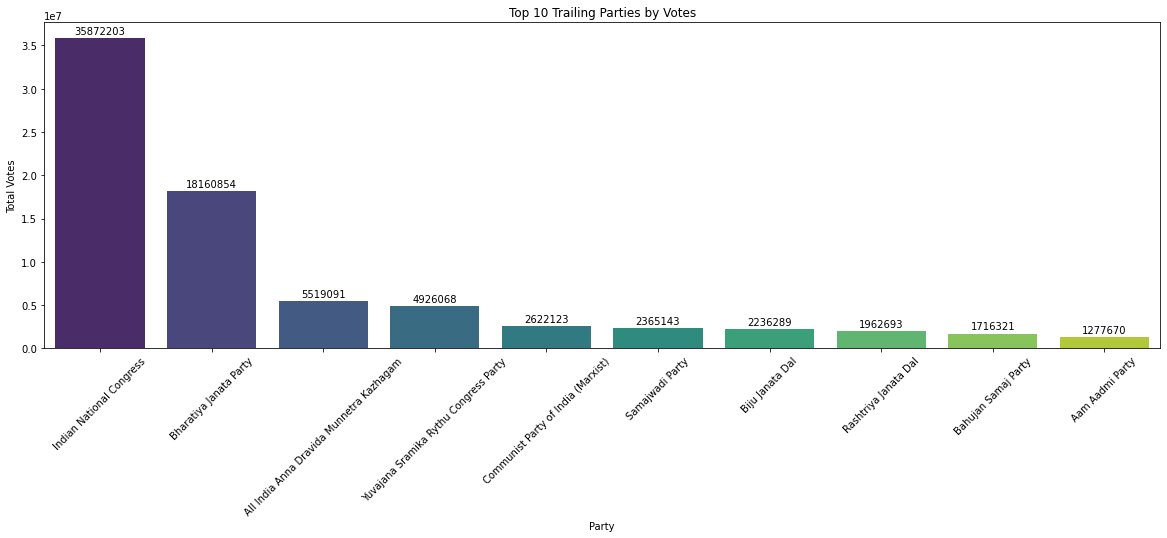

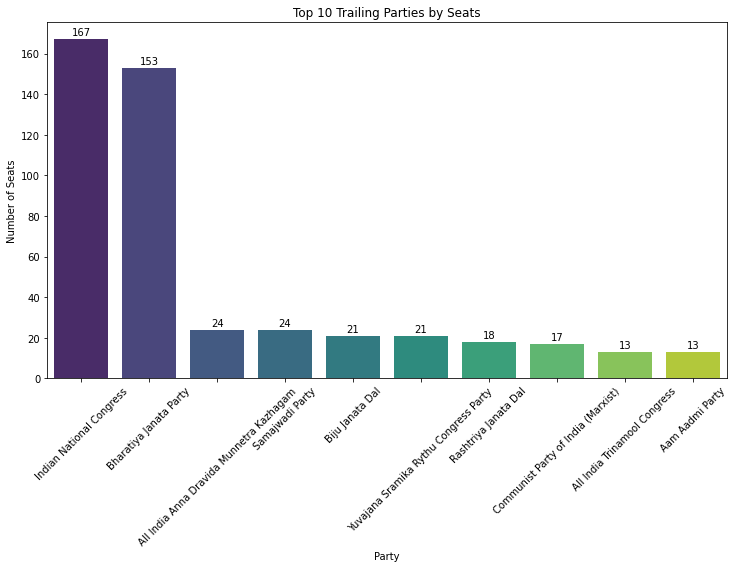

In [225]:
# do group by with respect to trailing parties
# select Margin column from grouped parties and do sum of them 
# and at last sort descending

trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

#print(trailing_party_votes)
#print(leading_party_votes)

plt.figure(figsize=(20, 6))
plt.subplot(1, 1, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
show_numbers()
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
show_numbers()
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


INC's Trailing Votes: INC has a significantly higher number of trailing votes compared to BJP. This indicates that in constituencies where INC is not leading, it is trailing by a large margin.

BJP's Trailing Votes: BJP's trailing vote margin is substantially lower than that of INC, which suggests that BJP is more competitive even in constituencies where it is not winning.

INC's Seats: INC has 167 seats, which is higher than BJP's 153 seats. Despite having more seats, the higher trailing vote margin suggests that INC has significant areas where it is not performing well.

BJP's Seats: BJP, with 153 seats, is only 14 seats behind INC. Given the much lower trailing vote margin, BJP appears to be more consistently competitive across constituencies.

Despite INC having a higher seat count, the significantly larger trailing vote margin compared to BJP suggests that INC's support is less evenly distributed, with large areas of weak performance. BJP, with a lower trailing vote margin, demonstrates a more uniformly competitive presence across constituencies. 

# Top 10 Leading Party by Votes Margin and Seats

C:\Users\jiten\AppData\Local\Temp\ipykernel_16424\1772317635.py:29: UserWarning: Glyph 159 (\x9f) missing from current font.
  plt.tight_layout()


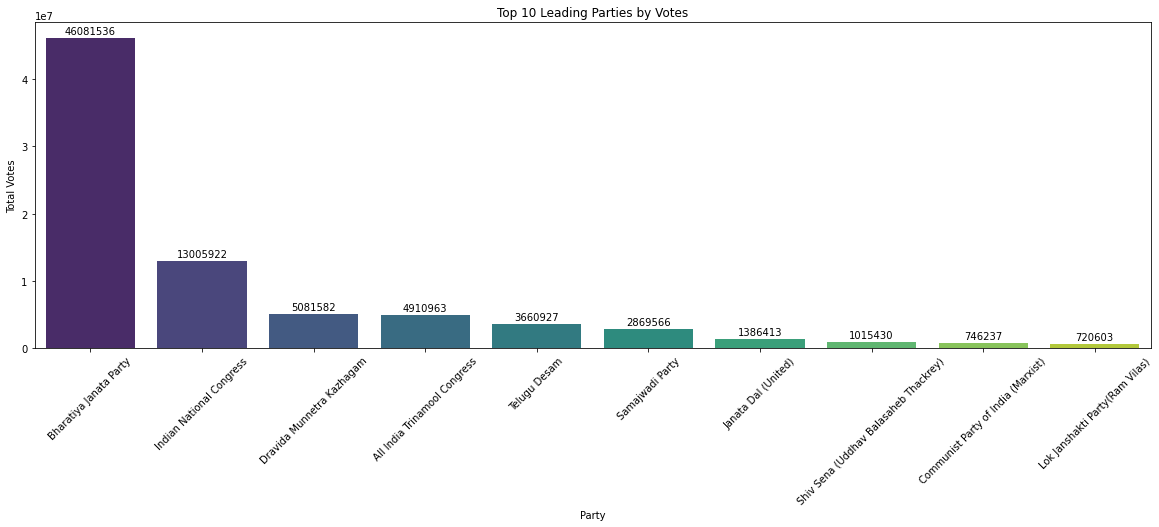

C:\Users\jiten\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


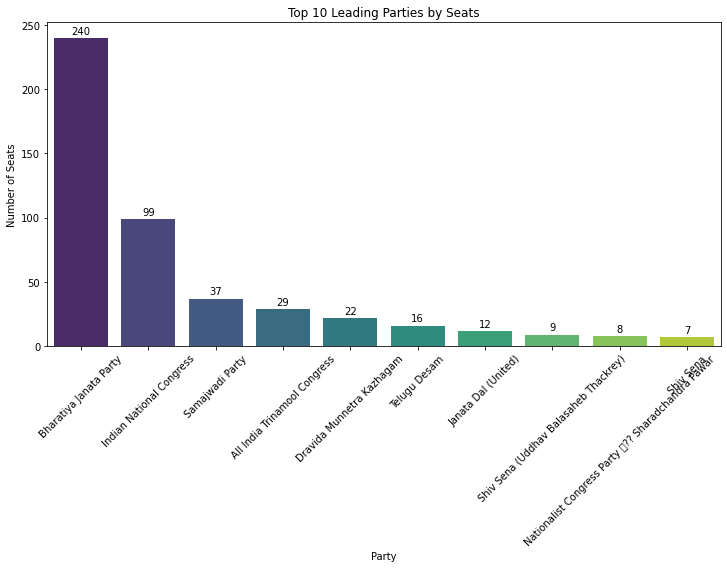

In [226]:
# count the Trailing party values/seats
leading_party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
leading_party_seats = data['Leading Party'].value_counts()

#print(trailing_party_seats)
#print(leading_party_seats)



plt.figure(figsize=(20, 6))
# Plot votes distribution by trailing party
plt.subplot(1, 1, 1)
sns.barplot(x=leading_party_votes.index[:10], y=leading_party_votes.values[:10], palette='viridis')
show_numbers()
plt.title('Top 10 Leading Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)


plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=leading_party_seats.index[:10], y=leading_party_seats.values[:10], palette='viridis')
show_numbers()
plt.title('Top 10 Leading Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

BJP's Leading Votes: BJP has a significantly higher vote margin (46,081,536) in constituencies where it is leading, which indicates strong and widespread support across these areas.

INC's Leading Votes: INC has a much lower vote margin (13,005,922) in the constituencies where it is leading, suggesting less dominance compared to BJP in its leading areas.

BJP's Seats: BJP is leading in 240 seats, which is more than double the seats of INC. This substantial lead in the number of seats demonstrates BJP's strong electoral performance.

INC's Seats: INC is leading in 99 seats, which is significantly fewer than BJP. This indicates that INC's influence and voter support are concentrated in fewer constituencies.

The data shows that BJP is currently in a very strong position, leading by a large margin in both votes and seats. INC, while having a significant presence, is far behind in both metrics.